<a href="https://colab.research.google.com/github/Kamchatkina/sofaanka/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%D0%BE%D0%B2%20A/B%20%D1%82%D0%B5%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns

In [87]:
df = pd.read_csv('AB_Test_Results.csv')

In [88]:
df.head()

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0


In [89]:
df.sort_values(by='REVENUE')

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.00
6635,3405,control,0.00
6636,9921,variant,0.00
6637,442,variant,0.00
6638,9539,control,0.00
...,...,...,...
8168,2166,control,29.32
9421,6792,control,41.53
7642,7206,variant,57.46
6447,2881,variant,58.63


In [90]:
df[df['REVENUE'] != 0.0]

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


Нет пустых строк

In [92]:
df.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


в основном доход у пользователей равен 0

In [93]:
df.groupby(['VARIANT_NAME'], as_index=False).count()

,VARIANT_NAME,USER_ID,REVENUE
0,control,4984,4984
1,variant,5016,5016


In [94]:
df_counts = df.groupby('VARIANT_NAME')[['USER_ID']].count().reset_index()
df_counts.columns = ['VARIANT_NAME', 'COUNT']
df = pd.merge(df, df_counts, on='VARIANT_NAME')
if 'COUNT_x' in df.columns and 'COUNT_y' in df.columns:
    df['COUNT'] = df['COUNT_x']
    df = df.drop(columns=['COUNT_x', 'COUNT_y'])
df

,USER_ID,VARIANT_NAME,REVENUE,COUNT
0,737,variant,0.0,5016
1,2423,control,0.0,4984
2,9411,control,0.0,4984
3,7311,control,0.0,4984
4,6174,variant,0.0,5016
...,...,...,...,...
9995,1981,control,0.0,4984
9996,502,variant,0.0,5016
9997,9214,variant,0.0,5016
9998,7741,control,0.0,4984


<Axes: xlabel='VARIANT_NAME', ylabel='count'>

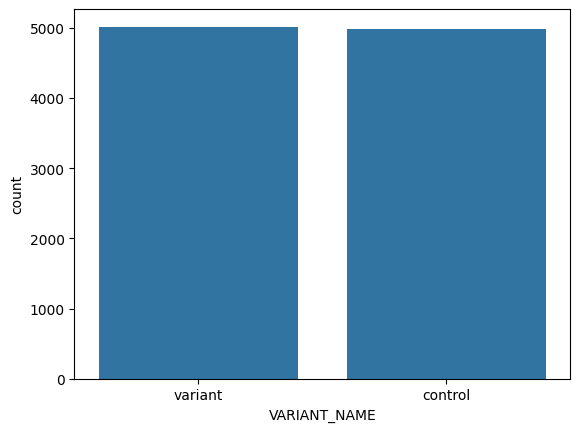

In [95]:
sns.countplot(x = df['VARIANT_NAME'], data=df)

In [96]:
df.groupby(by="VARIANT_NAME")[["REVENUE"]].mean()

,REVENUE
VARIANT_NAME,
control,0.129013
variant,0.070070


среднее значение дохода контрольной и тестовой групп

In [19]:
df.groupby(by="VARIANT_NAME")[["REVENUE"]].std()

,REVENUE
VARIANT_NAME,
control,3.007524
variant,1.314802


стандартное отклонение средней и тестовой групп

In [20]:
group_a = df[df["VARIANT_NAME"]=="control"]["REVENUE"].to_list()
group_b = df[df["VARIANT_NAME"]=="variant"]["REVENUE"].to_list()

In [99]:
df_1 = df[df["VARIANT_NAME"]=="control"]
df_2 = df[df["VARIANT_NAME"]=="variant"]

In [25]:
import scipy.stats as stats
import matplotlib.pyplot as plt


In [22]:
stat_a,p_a = stats.shapiro(group_a)
stat_b,p_b = stats.shapiro(group_b)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


In [23]:
print("p-value for group a", p_a)
print("p_value for group b", p_b)

p-value for group a 2.4983285100057203e-95
p_value for group b 2.7310104028899288e-95


так как p-value < 0.05 то распределение не нормальное в обоих случаях

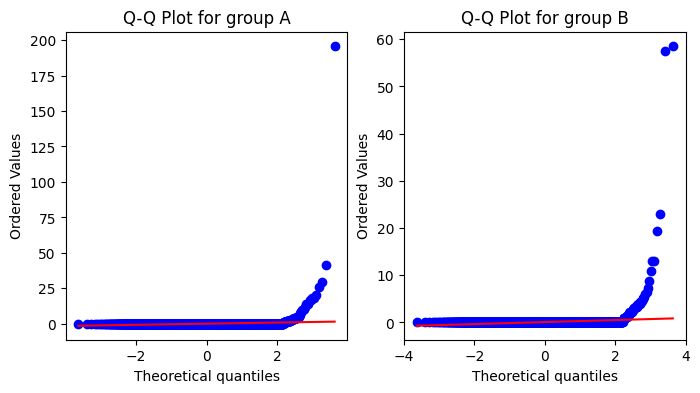

In [26]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4))

stats.probplot(group_a,plot=ax1)
ax1.set_title("Q-Q Plot for group A")

stats.probplot(group_b, plot=ax2)
ax2.set_title("Q-Q Plot for group B")

plt.show()

На графике заметны выбросы в обоиз случаях

In [102]:
test_stat, p_val = stats.levene(group_a,group_b)

In [103]:
print(f"p_values for levene test,{p_val}")

p_values for levene test,0.2037000785338918


так как p-value > 0.05, то тест Левене показал, что группы имеют равные дисперсии

In [104]:
def detect_outliers(data):
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    lower_boundary = q1 - 1.5 * iqr
    upper_boundary = q3 + 1.5 * iqr

    ourliers = [x for x in data if x < lower_boundary or x > upper_boundary]
    return ourliers

In [105]:
group_a_iqr = [non_outliers for non_outliers in group_a if non_outliers not in detect_outliers(group_a)]
group_b_iqr = [non_outliers for non_outliers in group_b if non_outliers not in detect_outliers(group_b)]

In [106]:
print(len(group_a_iqr),len(group_b_iqr))


4904 4944


кол-во элементов в группах после удаления выбросов c помощью iqr

In [107]:
from scipy.stats import zscore

In [108]:
def zscore_outliers(data):
    z_scores = zscore(data)
    outliers = np.where(np.abs(z_scores) > 3)
    return outliers

In [109]:
group_a_zscore = [non_outlier for non_outlier in group_a if group_a.index(non_outlier) not in zscore_outliers(group_a)[0]]
group_b_zscore = [non_outlier for non_outlier in group_b if group_b.index(non_outlier) not in zscore_outliers(group_b)[0]]

In [113]:
len(group_a_zscore), len(group_b_zscore)

(4967, 4999)

кол-во элементов в группах после удаления выбросов c помощью iqr

In [35]:
import scipy.stats as stats

test_stat_a,p_a = stats.shapiro(group_a_zscore)
test_stat_b,p_b = stats.shapiro(group_b_zscore)

In [36]:
print(p_a,p_b)

4.5208584326766566e-94 2.673011597264835e-94


Данные не имеют нормального распределения в обеих группах

In [114]:
test_stat,p = stats.levene(group_a_zscore,group_b_zscore)
print(test_stat, p)

4.809062673872786 0.028333473170325738


Дисперсии групп статистически различны

In [38]:
t_stats,p_value = stats.mannwhitneyu(group_a_zscore,group_b_zscore)
print(p_value)

0.4287478884790942


In [115]:
if p_value > 0.05:
    print("Нет статистической значимой разницы между контрольной и тестовой группой")
else:
    print("Статистическая значимая разница между контрольной и тестовой группой")

Нет статистической значимой разницы между контрольной и тестовой группой


Анализ выбросов
Данные были очищены двумя методами:
Метод межквартильного размаха (IQR)
Метод z-score (удаление значений, отклоняющихся более чем на 3 стандартных отклонения)
Статистический анализ
Проверка нормальности распределения (тест Шапиро-Уилка):
p-значения для обеих групп крайне малы (4.52e-94 и 2.67e-94)
Распределение доходов в обеих группах не является нормальным
Проверка равенства дисперсий (тест Левена):
p-значение = 0.028 < 0.05
Дисперсии групп статистически различны
Сравнение групп (тест Манна-Уитни):
p-значение = 0.429 > 0.05
Нет статистически значимой разницы между контрольной и тестовой группами

Можно сделать вывод, что внедрение изменение фичи не оправдается и не принесет ожидаемых результатов